# Birth–death process

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

### Initial values

In [2]:
n = 5

In [3]:
density_matrix = np.zeros((n,n))
left = np.zeros(n)
right = np.zeros(n)
for i in range(n-1):
    #left[i] = np.random.random()
    #right[i] = np.random.random()
    left[i] = np.random.randint(1,100)
    right[i] = np.random.randint(1, 100)
right = np.array([3.75,2.5,1.65,5.65])
left = np.array([4.2,5.45,3.3,2.85])

upper_diagonal = np.diagonal(density_matrix,offset=1)
bottom_diagonal = np.diagonal(density_matrix,offset=-1)
upper_diagonal.setflags(write = True)
bottom_diagonal.setflags(write = True)
for i in range(n-1):
    upper_diagonal[i]=right[i]
    bottom_diagonal[i]=left[i]

In [4]:
density_matrix

array([[0.  , 3.75, 0.  , 0.  , 0.  ],
       [4.2 , 0.  , 2.5 , 0.  , 0.  ],
       [0.  , 5.45, 0.  , 1.65, 0.  ],
       [0.  , 0.  , 3.3 , 0.  , 5.65],
       [0.  , 0.  , 0.  , 2.85, 0.  ]])

### Analytical solution

In [5]:
alpha = np.zeros(n)
p = np.zeros(n)
for i in range(n):
    alpha[i] = np.prod(right[:i])/np.prod(left[:i])
p = np.zeros(n)
p[0] = 1/(1+sum(alpha[1:]))
for i in range(n-1):
    p[i+1] = p[0]*alpha[i+1]

In [6]:
p

array([0.34326712, 0.3064885 , 0.14059105, 0.07029553, 0.1393578 ])

## via Kolmogorov

In [7]:
coefficient_matrix = density_matrix.copy()
upper_diagonal = np.diagonal(coefficient_matrix,offset=1)
bottom_diagonal = np.diagonal(coefficient_matrix,offset=-1)
upper_diagonal.setflags(write = True)
bottom_diagonal.setflags(write = True)
for i in range(n-1):
    coefficient_matrix[i][i]-=upper_diagonal[i]
for i in range(n-1):
    coefficient_matrix[i+1][i+1]-=bottom_diagonal[i]
for i in range(n-1):
    upper_diagonal[i],bottom_diagonal[i] = bottom_diagonal[i],upper_diagonal[i]

In [8]:
coefficient_matrix

array([[-3.75,  4.2 ,  0.  ,  0.  ,  0.  ],
       [ 3.75, -6.7 ,  5.45,  0.  ,  0.  ],
       [ 0.  ,  2.5 , -7.1 ,  3.3 ,  0.  ],
       [ 0.  ,  0.  ,  1.65, -8.95,  2.85],
       [ 0.  ,  0.  ,  0.  ,  5.65, -2.85]])

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 9093.54it/s]


start [1, 0, 0, 0, 0]
end   [0.34508412539041555, 0.30772675687320233, 0.1406613775387571, 0.06948983560834748, 0.13703790458928192]


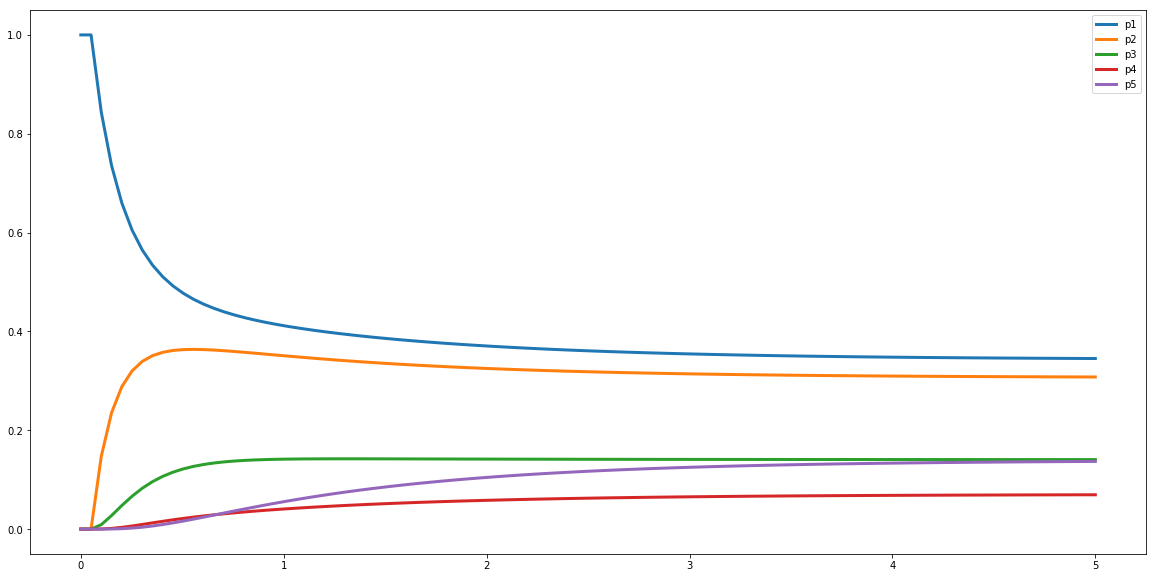

In [9]:
eigenvalues = np.linalg.eig(coefficient_matrix)[0]
eigenvectors = np.linalg.eig(coefficient_matrix)[1]

t1 = []
p1 = []
for j in range(n):
    p1.append([0])
p1[0]=[1]
endtime = 5
c = np.linalg.solve(eigenvectors,[i[0] for i in p1])
for j in tqdm(np.linspace(0, endtime, num=100)):
    t1.append(j)
    for k in range(n):
        p1[k].append(0)
        for l in range(n):
            p1[k][-1]+=c[l]*eigenvectors[k][l]*np.exp(eigenvalues[l]*j)
            #p1[k][-1]+=c[l]*eigenvectors[l][k]*np.exp(eigenvalues[l]*j)
print('start',[j[0] for j in p1])
print('end  ',[j[-1] for j in p1])
plt.figure(figsize=(20,10))
for m in range(n):
    plt.plot(t1,p1[m][:-1], linewidth=3)
    plt.legend(['p'+str(i+1) for i in range(n)])
plt.show()

##  via Simulation 

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [09:06<00:00, 182.92it/s]


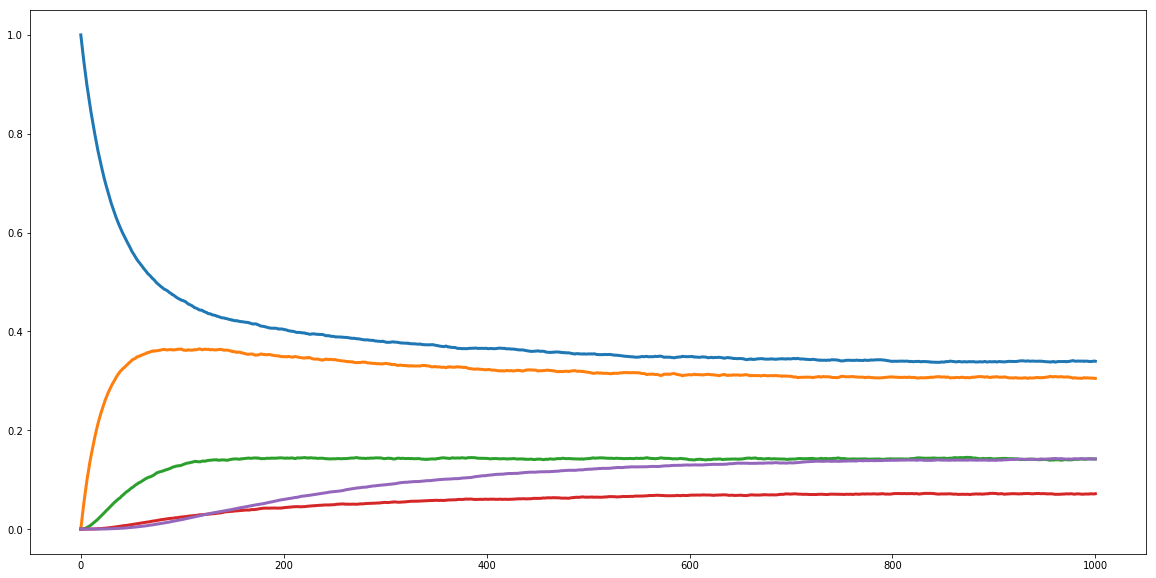

In [10]:
time = 0
endtime = 5
current_state=1
numofdots = 1000
step = endtime/numofdots
era = []
epoch = 100000
for i in tqdm(range(epoch)):
    current_state=1
    states = []
    for j in np.linspace(0,endtime,numofdots):
        if current_state==1:
            randtimeup = np.random.exponential(1/density_matrix[0][1])
            if randtimeup>step:
                #time+=step
                states.append(current_state)
            else:
                time=0
                current_state+=1
                states.append(current_state)
        elif current_state==n:
            randtimedown = np.random.exponential(1/density_matrix[n-1][n-2])
            if randtimedown>step:
                #time+=step
                states.append(current_state)
            else:
                time=0
                current_state-=1
                states.append(current_state)
        else:
            randtimeup = np.random.exponential(1/density_matrix[current_state-1][current_state])
            randtimedown = np.random.exponential(1/density_matrix[current_state-1][current_state-2])
            if randtimedown>step and randtimeup>step:
                #time+=step
                states.append(current_state)
            elif randtimeup<step:
            
                time=0
                current_state+=1
                states.append(current_state)
            elif randtimedown<step:
                time=0
                current_state-=1
                states.append(current_state)
    era.append(states)
    
era = np.array(era)
p3 = [[1], [0], [0], [0], [0]]
for j in range(5):
    p3.append([])
    for i in range(numofdots):
        try:
            p3[j].append(np.unique(era[:,i],return_counts=True)[1][j]/epoch)
        except:
            p3[j].append(0)
plt.figure(figsize=(20,10))
for i in range(n):
    plt.plot(p3[i], linewidth=3)